# Substructure Matching

Trying to figure if a substructure is present in one or more molecules is one of the most common filtering steps in cheminformatics.

Here, we explore some code snippets that will do substructure matching

In [4]:
# Import the necessary libraries

import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

In [5]:
#import a sample dataset containing SMILES:

pi3k = pd.read_csv("data/FINE_TUNING_pi3k-mtor_objectives.csv")
pi3k.head(3)

,SMILES,pKi IC50 Pi3K,pKi IC50 mTor,Water Solubility,Caco2 permeability,CYP1A2 inhibitor,CYP3A4 inhibitor,Total Clearance
0,Cc1ncnc(-c2ccc(cc2)C(=O)N2CCN3CCCCC3C2)c1C#Cc1...,7.091515,7.769551,-3.540,1.377,0.0,1.0,NaN
1,Cc1ncnc(-c2ccc(cc2)C(C)(C)C#N)c1C#Cc1ccc(N)nc1,7.619789,7.619789,-3.864,1.302,1.0,1.0,0.798
2,Cc1ncnc(-c2ccc(cc2)S(C)(=O)=O)c1C#Cc1ccc(N)nc1,7.187087,8.096910,-3.535,0.274,1.0,1.0,0.899


In [6]:
# Calculate the mol object:

pi3k['mol'] = pi3k['SMILES'].apply(lambda x: Descriptors.Chem.MolFromSmiles(x))

In [15]:
#Define the pattern we wish to see:
pattern = Chem.MolFromSmarts('c1ccccc1C(=O)N')

#create an empty list to store matched molecules from the dataframe:
matches_mol = [] 

# Define a function to detect the pattern:
def sub_match(mol):

    if mol.HasSubstructMatch(pattern) == True:
        
        matches_mol.append(Chem.MolToSmiles(mol))
        return "True"
    
    else:
        return "False"

In [16]:
pi3k['sub_present?'] = pi3k['mol'].apply(lambda x: sub_match(x))

In [17]:
pi3k.head(3)

,SMILES,pKi IC50 Pi3K,pKi IC50 mTor,Water Solubility,Caco2 permeability,CYP1A2 inhibitor,CYP3A4 inhibitor,Total Clearance,mol,sub_present?
0,Cc1ncnc(-c2ccc(cc2)C(=O)N2CCN3CCCCC3C2)c1C#Cc1...,7.091515,7.769551,-3.540,1.377,0.0,1.0,NaN,<rdkit.Chem.rdchem.Mol object at 0x1530cf370>,True
1,Cc1ncnc(-c2ccc(cc2)C(C)(C)C#N)c1C#Cc1ccc(N)nc1,7.619789,7.619789,-3.864,1.302,1.0,1.0,0.798,<rdkit.Chem.rdchem.Mol object at 0x1530ce9d0>,False
2,Cc1ncnc(-c2ccc(cc2)S(C)(=O)=O)c1C#Cc1ccc(N)nc1,7.187087,8.096910,-3.535,0.274,1.0,1.0,0.899,<rdkit.Chem.rdchem.Mol object at 0x1530ce8f0>,False


We can see that the first smiles in the dataframe contains the pattern as it is labelled "True"

Let's visualise the pattern in this first molecule, using a higlighter:

((8, 7, 6, 11, 10, 9, 12, 13, 14),)


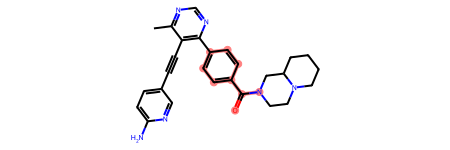

In [21]:
from rdkit.Chem.Draw import rdMolDraw2D

m = Chem.MolFromSmiles(pi3k.SMILES[0])
substructure = Chem.MolFromSmarts('c1ccccc1C(=O)N')

#one can also get the atom indices of the pattern in the parent molecule
print(m.GetSubstructMatches(substructure))

m

## Another succint way towards substructure matching as written by Copilot:

In [27]:
def check_substructure(df, substructure_smiles):
    """
    Checks if SMILES strings in the DataFrame contain the specified substructure.

    Args:
        df (pd.DataFrame): DataFrame containing a 'smiles' column with SMILES strings.
        substructure_smiles (str): SMILES string representing the substructure to search for.

    Returns:
        pd.Series: A boolean Series indicating whether each SMILES contains the substructure.
    """
    substructure_mol = Chem.MolFromSmiles(substructure_smiles)
    if substructure_mol is None:
        raise ValueError("Invalid substructure SMILES.")

    def has_substructure(smiles):
        mol = Chem.MolFromSmiles(smiles)
        return mol is not None and mol.HasSubstructMatch(substructure_mol)

    return df['smiles'].apply(has_substructure)

# Example usage:
if __name__ == "__main__":
    # Load your SMILES data into a pandas DataFrame 'df'
    # Assuming 'df' has a column named 'smiles'
    smiles_df = pd.DataFrame({'smiles': ['CCO', 'C1CCCC1', 'CNC']})

    # Specify the substructure SMILES you want to search for
    my_substructure = 'CCO'  # Example: Ethanol

    # Check if each SMILES contains the specified substructure
    result_series = check_substructure(smiles_df, my_substructure)
    print(result_series)
    
    lldata = smiles_df.merge(pd.DataFrame(result_series), how='left', left_index=True, right_index=True)

0     True
1    False
2    False
Name: smiles, dtype: bool


In [28]:
lldata

,smiles_x,smiles_y
0,CCO,True
1,C1CCCC1,False
2,CNC,False
